In [37]:
from __future__ import print_function

In [38]:
import cx_Oracle as ora
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
def setKoreanFont() :
    from matplotlib import font_manager, rc
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/gulim.ttc").get_name()
    rc("font", family=font_name)
    plt.rcParams["font.size"]=15
    plt.rcParams["figure.figsize"] = 14,8

In [72]:
# Oracle 연결 : 
con = ora.connect("WJV/wjvc3005@10.101.1.212:1521/CDW")

In [73]:
df_rslt = pd.read_sql("""

SELECT /*+ PARALLEL(4) FULL(A) */
       SLPART_CD 
      ,TO_DATE(PORD_DT,'YYYYMMDD') ORD_DT      
      ,COUNT(1) ORD_CNT
  FROM WJM.TW_CT_SALE_MST_MM A
 WHERE SALE_YYMM = '201906'
   AND PORD_DT BETWEEN '20190601' AND '20190630'
   AND TO_CHAR(TO_DATE(PORD_DT,'YYYYMMDD'),'dy') NOT IN('토','일')
   AND PORD_DT <> '20190606'
 GROUP BY
       SLPART_CD 
      ,PORD_DT
 ORDER BY
       SLPART_CD 
      ,PORD_DT

""", con=con)

con.close()

In [74]:
print(df_rslt)

   SLPART_CD     ORD_DT  ORD_CNT
0          1 2019-06-03      955
1          1 2019-06-04       86
2          1 2019-06-05      254
3          1 2019-06-07      118
4          1 2019-06-10      351
5          1 2019-06-11      190
6          1 2019-06-12      369
7          1 2019-06-13      237
8          1 2019-06-14      408
9          1 2019-06-17      528
10         1 2019-06-18      413
11         1 2019-06-19      448
12         1 2019-06-20      520
13         1 2019-06-21      476
14         1 2019-06-24      465
15         1 2019-06-25      698
16         1 2019-06-26      886
17         1 2019-06-27     2180
18         1 2019-06-28     4747
19         2 2019-06-03     1102
20         2 2019-06-04     2135
21         2 2019-06-05     5141
22         2 2019-06-07     4810
23         2 2019-06-10     5338
24         2 2019-06-11     3523
25         2 2019-06-12     4123
26         2 2019-06-13     4233
27         2 2019-06-14     4165
28         2 2019-06-17     5579
29        

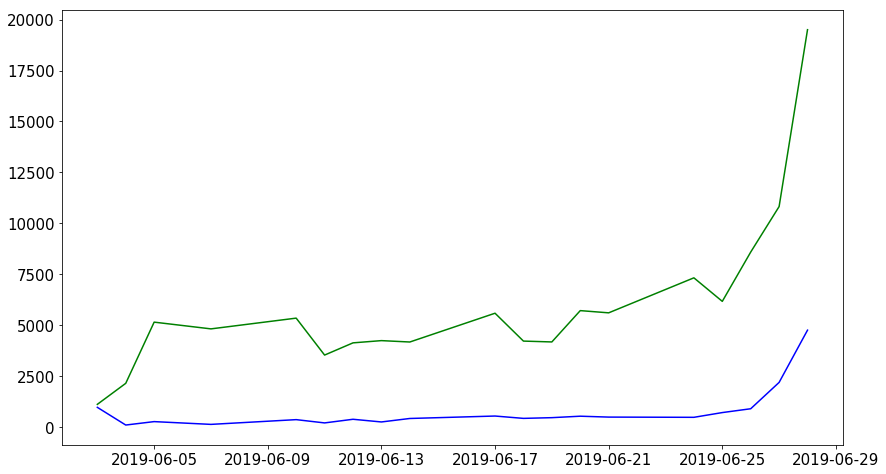

In [75]:
setKoreanFont()
plt.plot(df_rslt[df_rslt["SLPART_CD"]=="1"]["ORD_DT"],df_rslt[df_rslt["SLPART_CD"]=="1"]["ORD_CNT"],color="BLUE")
plt.plot(df_rslt[df_rslt["SLPART_CD"]=="2"]["ORD_DT"],df_rslt[df_rslt["SLPART_CD"]=="2"]["ORD_CNT"],color="GREEN")
plt.show()

In [76]:
print(df_rslt["ORD_CNT"].sum())

126552
